<a href="https://colab.research.google.com/github/vaestrada/PortfolioProjectsMLE/blob/main/DogCat_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
drive_path = '/content/drive/MyDrive/DL/CatDogClassifier/'


In [7]:
X_train = np.loadtxt(drive_path + 'input.csv', delimiter=',')
Y_train = np.loadtxt(drive_path + 'labels.csv', delimiter=',')

X_test = np.loadtxt(drive_path + 'input_test.csv', delimiter=',')
Y_test = np.loadtxt(drive_path + 'labels_test.csv', delimiter=',')

In [8]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


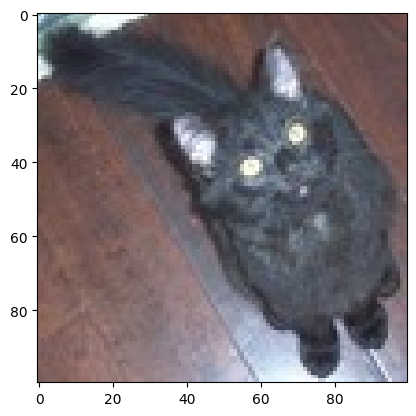

In [10]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 23s 673ms/step - loss: 0.7092 - accuracy: 0.4950
Epoch 2/5
32/32 [==============================] - 22s 665ms/step - loss: 0.6907 - accuracy: 0.5040
Epoch 3/5
32/32 [==============================] - 20s 634ms/step - loss: 0.6811 - accuracy: 0.5495
Epoch 4/5
32/32 [==============================] - 20s 635ms/step - loss: 0.6465 - accuracy: 0.6180
Epoch 5/5
32/32 [==============================] - 22s 686ms/step - loss: 0.5891 - accuracy: 0.6885


In [27]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 110ms/step - loss: 0.6019 - accuracy: 0.6850


[0.6018947958946228, 0.6850000023841858]

# Making predictions

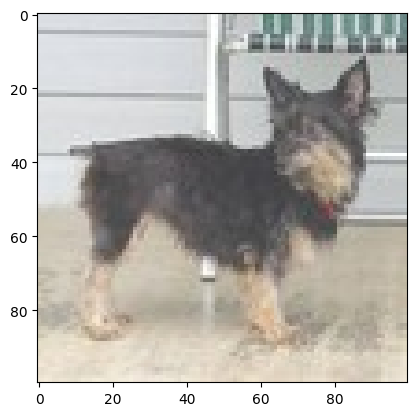

1/1 [==============================] - 0s 115ms/step
[[0.33235785]]
Our model says it is a: dog


In [28]:
# Randomly select an index from the test dataset
idx2 = random.randint(0, len(Y_test))

# Display the image at the randomly chosen index
plt.imshow(X_test[idx2, :])
plt.show()

# Use the trained model to make predictions on the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

print(y_pred)
# Convert the predicted probability to a binary decision (cat or dog)
y_pred = y_pred > 0.5

# Check the predicted class and assign a label (dog or cat)
if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

# Print the final prediction
print("Our model says it is a:", pred)